# M2608.001300 기계학습 기초 및 전기정보 응용<br> Assignment 1: Logistic Regression

## Dataset load & Plot

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

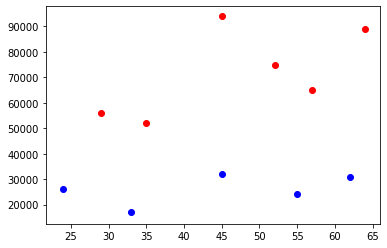

In [2]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

## Problem 1-1. sklearn model로 Logistic Regression 모델 train 시켜보기
scikit-learn library의 LogisticRegression 클래스를 이용해 train 시켜 보세요. <br>
클래스 인자 및 사용법에 관해서는 scikit-learn 홈페이지의 설명을 참고해 주세요. <br>
(참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [3]:
def learn_and_return_weights(X, y):
    from sklearn.linear_model import LogisticRegression
    # YOUR CODE COMES HERE
    model = LogisticRegression(solver='liblinear').fit(X, y)
    
    # w: coefficient of the model to input features,
    w = model.coef_[0]
    
    # b: bias of the model
    b = model.intercept_
    
    print(w, b, model.n_iter_)
    return w, b

[-1.93805125e-01  1.90809864e-04] [-0.00760874] [18]


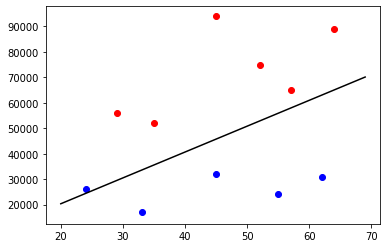

In [4]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. numpy로 Logistic Regression 구현해보기
scikit-learn library를 사용하지 않고 Logistic Regression을 구현해보세요.

In [5]:
def sigmoid(z):
    # YOUR CODE COMES HERE
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_pred, target):
    # YOUR CODE COMES HERE
    loss = (-target * np.log(y_pred + 1e-9) - (1 - target) * np.log(1 - y_pred + 1e-9))
    return loss.mean()
    
def learn_and_return_weights_numpy(X, Y, lr=.01, iter=100000):
    # YOUR CODE COMES HERE
    num_examples, num_features = np.shape(X)
    intercept = np.ones((num_examples, 1))
    X = np.concatenate((intercept, X), axis=1)
    W = np.zeros(num_features + 1)
    
    loss = []
    for i in range(iter):
        z = np.dot(X, W)
        h = sigmoid(z)
        loss += [binary_cross_entropy_loss(h, Y)]
            
        grad = np.dot(X.transpose(), h-Y) / num_examples
        W -= lr * grad
    
#     plt.subplot(211)
#     plt.plot(loss[1:])
    
    # w: coefficient of the model to input features,
    w = W[1:num_features + 1]
    
    # b: bias of the model
    b = W[0]
    
    return w, b

In [6]:
# from sklearn import datasets
# iris = sklearn.datasets.load_iris()
# X = iris.data[:, :2]
# y = (iris.target != 0) * 1

# label_mask = np.equal(y, 1)

# w, b = learn_and_return_weights_numpy(X, y)

# plt.subplot(212)
# plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
# plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

# x_lin = np.arange(4, 8)
# y_lin = -(-.5 + b + w[0] * x_lin) / w[1]

# plt.plot(x_lin, y_lin, color='black');
# plt.show()

[-5.01589545e+02  4.54545513e-01] -11.955909090906113


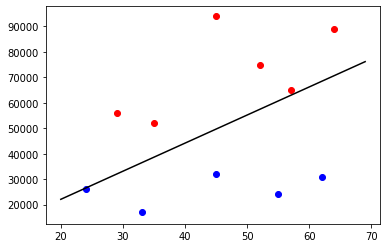

Binary cross entropy loss: -1.0000000822403707e-09
You need to make sure your binary cross entropy loss function is correct,
or use np.clip to clip the argument of the logarithm from small number (e.g. 1e-10) to 1.


In [7]:
w, b = learn_and_return_weights_numpy(X, y)
print(w, b)
# plt.subplot(212)
plot_data_and_weights(X, y, w, b)

z = np.dot(X, w) + b
y_output = sigmoid(z)
bce = binary_cross_entropy_loss(y_output,y)
print('Binary cross entropy loss:', bce)
if (np.isnan(bce) == True) or (bce < 0):
    print('You need to make sure your binary cross entropy loss function is correct,\nor use np.clip to clip the argument of the logarithm from small number (e.g. 1e-10) to 1.')

## Problem 2. sklearn model로 Logistic Regression 모델 train 시켜보기 + regularizer 사용하기
scikit-learn library의 Logistic Regression 에 대한 API문서를 읽어보고,<br>
L1-regularization을 사용할 때와 L2-regularization을 사용할 때의 weight의 변화를 살펴보세요. <br>
(참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [8]:
def learn_and_return_weights_l1_regularized(X, y):    
    # YOUR CODE COMES HERE
    model = LogisticRegression(penalty='l1', solver='liblinear').fit(X, y)
    
    # w: coefficient of the model to input features,
    w = model.coef_[0]
#     print(model.coef_)
    
    # b: bias of the model
    b = model.intercept_
    
    return w, b

def learn_and_return_weights_l2_regularized(X, y):    
    # YOUR CODE COMES HERE
    model = LogisticRegression(penalty='l2', solver='liblinear').fit(X, y)
    
    # w: coefficient of the model to input features,
    w = model.coef_[0]
#     print(model.coef_)
    
    # b: bias of the model
    b = model.intercept_
    
    return w, b

In [9]:
def get_dataset():
    D = 1000
    N = 80

    X = np.random.random((N, D))
    w = np.zeros(D)
    w[0] = 1
    w[1] = 1
    
    e = np.random.random(N) - 0.5
    
    y_score = np.dot(X, w)
    y_score_median = np.median(y_score)
    print(y_score.max(), y_score.min(), y_score_median)
    
    # y_score += 0.01 * e
    y = y_score >= y_score_median
    y = y.astype(np.int32)
    
    return (X[:N // 2], y[:N // 2]), (X[N // 2:], y[N // 2:])

In [10]:
(x_train, y_train), (x_test, y_test) = get_dataset()

w_l1, b_l1 = learn_and_return_weights_l1_regularized(x_train, y_train)
w_l2, b_l2 = learn_and_return_weights_l2_regularized(x_train, y_train)

print(w_l1[:5])
print(w_l2[:5])

1.7772823651374037 0.12285306126103779 1.042333949124691
[2.2990606  1.22230146 0.         0.         0.        ]
[0.27197076 0.20141712 0.04319623 0.03378394 0.03493069]


## Problem 3-1. Logistic Regression으로 multi-class classification 하기: API 활용하기
scikit-learn library의 Logistic Regression API를 활용하면 multi-class classification을 간단하게 수행할 수 있습니다.<br>
MNIST dataset에 대해 multi-class classification을 위한 Logistic Regression 모델을 학습시키고, test data에 대한 accuracy를 계산해 보세요.

Using TensorFlow backend.


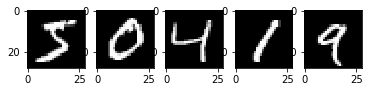

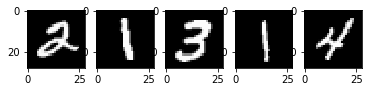

In [11]:
def plot_mnist_examples(x, length=10):
    x = x.reshape((-1, 28, 28))
    for i in range(length):
        plt.subplot('{}5{}'.format((length-1)//5 + 1, i%5 + 1))
        plt.imshow(x[i], cmap='gray')
        if i % 5 == 4:
            plt.show()
        
def get_dataset():
    from keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((-1, 28 * 28)).astype(np.float32)
    x_test = x_test.reshape((-1, 28 * 28)).astype(np.float32)
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = get_dataset()
train = (x_train, y_train)
test = (x_test, y_test)

plot_mnist_examples(x_train)
# plot_mnist_examples(x_test)

num_classes = 10

In [12]:
def learn_mul(X, y):
    # YOUR CODE COMES HERE
    lr = LogisticRegression(multi_class='multinomial').fit(X, y)
    return lr

def inference_mul(x, lr):
    # YOUR CODE COMES HERE
    y = lr.predict(x)
    return y

def plot_wrong(x, y, pred, length=10):
    wrong = []
    for i in range(len(y)):
        if pred[i] != y[i]:
            wrong.append(i)
    wrong_x = np.asarray([x[i] for i in wrong])

    print('Wrong Cases:', len(wrong_x))
    print(length, 'Samples')
    for i in range(length):
        print('({},{})'.format(pred[wrong[i]], y[wrong[i]]), end=' ')
        if i % 5 == 4:
            print()
    plot_mnist_examples(wrong_x, length)

Accuracy: 0.9255
Wrong Cases: 745
10 Samples
(6,5) (6,4) (2,3) (3,6) (4,7) 
(9,2) (3,9) (8,3) (7,5) (5,6) 


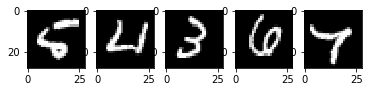

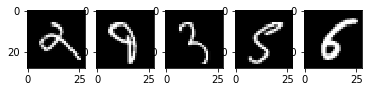

In [13]:
model = learn_mul(x_train, y_train)
preds = inference_mul(x_test, model)
accuracy = np.sum(preds == y_test) / y_test.shape[0]
print('Accuracy:', accuracy)
S
plot_wrong(x_test, y_test, preds)

## Problem 3-2. Logistic Regression으로 multi-class classification 하기: Transformation to Binary

Logistic Regression은 기본적으로 binary classifier 입니다. 즉, input *X*를 2개의 class로 밖에 분류하지 못합니다.<br>
하지만, 이같은 Logistic Regression 모델을 연달아 사용한다면 data를 여러 class로 분류할 수도 있습니다.<br>
(참고: https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_binary)

MNIST dataset을 이용하여 (class 수) 개의 Binary classifier (Logistic Regression)를 'lrs'의 각 원소에 저장한 뒤,<br>
학습시킨 모델들을 이용하여 test data에 대한 accuracy를 계산해 보세요.<br>
(각 모델의 training iteration은 10회면 충분합니다.)

In [14]:
def learn_mul2bin(X, y):
    lrs = []
    ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n/10%10!=1)*(n%10<4)*n%10::4])
    
    print(y[:10])
    for i in range(num_classes):
        print('training %s classifier...'%(ordinal(i)), end=' ')
        
        # YOUR CODE COMES HERE
        y_i = (y==i) * 1
        print(y_i[:10])
        
        lr = LogisticRegression(solver='liblinear', max_iter=10, penalty='l2')
        lr.fit(X, y_i)
        lrs.append(lr)
    return lrs

def inference_mul2bin(x, lrs):
    # YOUR CODE COMES HERE
    probs = np.zeros(num_classes)
    for i in range(num_classes):
        # for label 1
        probs[i] = lrs[i].predict_proba([x,])[0][1]
#     print(probs)
    y = np.argmax(probs)
    return y

[5 0 4 1 9 2 1 3 1 4]
training 0th classifier... [0 1 0 0 0 0 0 0 0 0]
training 1st classifier... [0 0 0 1 0 0 1 0 1 0]
training 2nd classifier... [0 0 0 0 0 1 0 0 0 0]
training 3rd classifier... [0 0 0 0 0 0 0 1 0 0]
training 4th classifier... [0 0 1 0 0 0 0 0 0 1]
training 5th classifier... [1 0 0 0 0 0 0 0 0 0]
training 6th classifier... [0 0 0 0 0 0 0 0 0 0]
training 7th classifier... [0 0 0 0 0 0 0 0 0 0]
training 8th classifier... [0 0 0 0 0 0 0 0 0 0]
training 9th classifier... [0 0 0 0 1 0 0 0 0 0]
Accuracy: 0.9176
Wrong Cases: 824
10 Samples
(6,5) (5,3) (6,4) (3,2) (2,3) 
(3,6) (8,2) (4,7) (9,2) (8,9) 


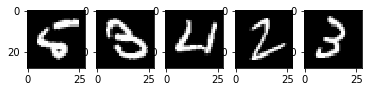

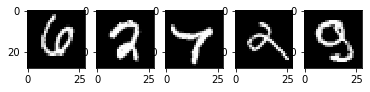

In [15]:
models = learn_mul2bin(x_train, y_train)
preds = np.array([inference_mul2bin(x, models) for x in x_test])
accuracy = np.sum(preds == y_test) / y_test.shape[0]
print('Accuracy:', accuracy)

plot_wrong(x_test, y_test, preds)